# CAB420 - Plot Gallery
## Part 1: Data Exploration
Dr Simon Denman (s.denman@qut.edu.au)

## Overview

This is part 1 of the plot gallery. This one focuses on data exploration, and the sort of plots that you might use for this. The overview here is very brief as the main details really are all below with each plot.

In [1]:
from sklearn.datasets import make_classification, make_regression
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Making some fake data

Cause we need something to plot.

In [2]:
X_class, y_class = make_classification(random_state=42, n_samples=1000, n_features=20, n_informative=5, n_redundant=2, n_repeated=0, n_classes=5, n_clusters_per_class=2)
X_reg, y_reg = make_regression(random_state=42, n_samples=1000, n_features=10, n_informative=5, effective_rank=7, n_targets=1, bias=0.2, tail_strength=0.5, noise=0.1)

### A Line Plot

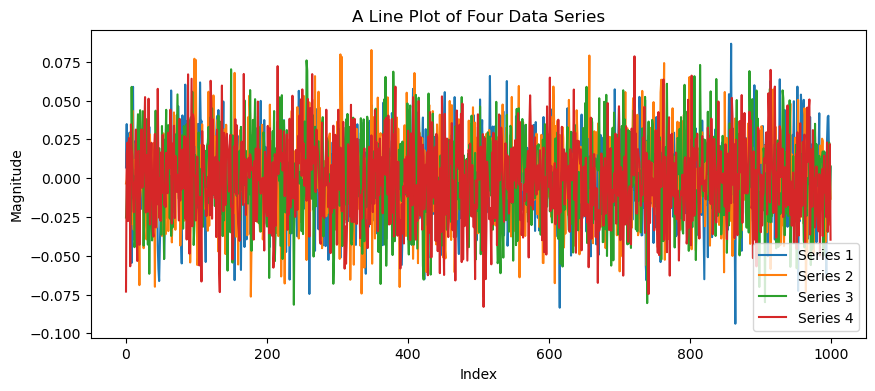

In [3]:
fig = plt.figure(figsize=[10, 4])
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_reg[:,0], label='Series 1')
ax.plot(X_reg[:,1], label='Series 2')
ax.plot(X_reg[:,2], label='Series 3')
ax.plot(X_reg[:,3], label='Series 4')
ax.set_xlabel('Index')
ax.set_ylabel('Magnitude')
ax.set_title('A Line Plot of Four Data Series')
ax.legend()

**What's it show?**
The data for each index for multiple data series. It makes it easy to see if there are anomalies in the data such as a run of missing values, or a run of 0's or some other constant that may indicate an error. Large outliers are also somewhat visible.

**When would you use it?**
Potentially as a very first visualisation step if you are concerned about missing or erroneous data. Line plots also make sense when there is a relationship between consecutive elements in the data. For example, if you have daily data of temperature then there is a relationship between one element in the next (a temporal relationship in this case). The presence of the line between the data does imply that consecutive samples are related.

**What does it not show?**
Properties of the data like the shape of the distribution, and even the spread may be hard to see. Lines can also get in each other's way - though we could plot this on four separate sets of axes.

**Is there any data it's bad for?**
Lots. As a plot it really only makes sense when you have that relationship between consecutive samples. There has to be some inherent order to the data, otherwise scatter plots or other visualisations probably make more sense.

### The Box Plot

Text(0.5, 1.0, 'A Box Plot')

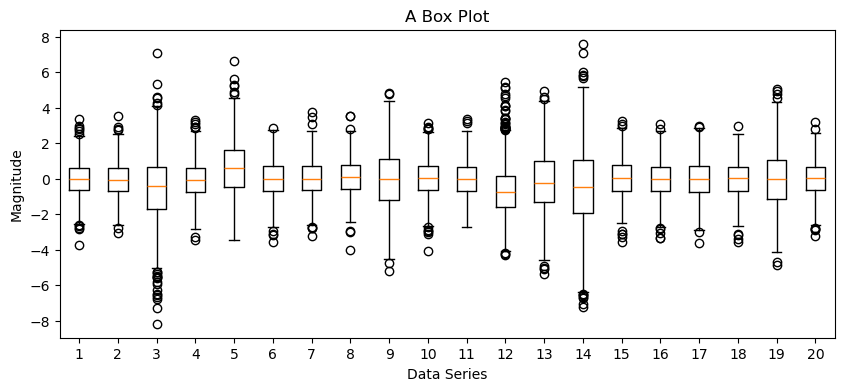

In [4]:
fig = plt.figure(figsize=[10, 4])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(X_class)
ax.set_xlabel('Data Series')
ax.set_ylabel('Magnitude')
ax.set_title('A Box Plot')

**What's it show?**
The median (orange line), inter-quartile distance (the box) and outliers (the dots, by default points more than 1.5 times the interquartile range away from the middle 50% of the data) for each data series.

**When would you use it?**
To quickly visualise a dataset. The box plot lets you very quickly and easily see the spread of each dimension. You can quickly check if all variables have approximatley the same range for example. This is a good plot to use to check if you might need to standardise your data. If you see dimensions with very different scales, standardisation might be a good idea. You can also spot large outliers, or large numbers of outliers, quite easily which might be helpful if you suspect there are errors or other noise related problems in the data.

**What does it not show?**
Fine details of the distribution. You don't know for example if these distributions are remotely Gaussian, or anything else - just their spread.

**Is there any data it's bad for?**
Categorical data types. It really makes no sense for categorical data.

### The Violin Plot

Text(0.5, 1.0, 'A Violin Plot')

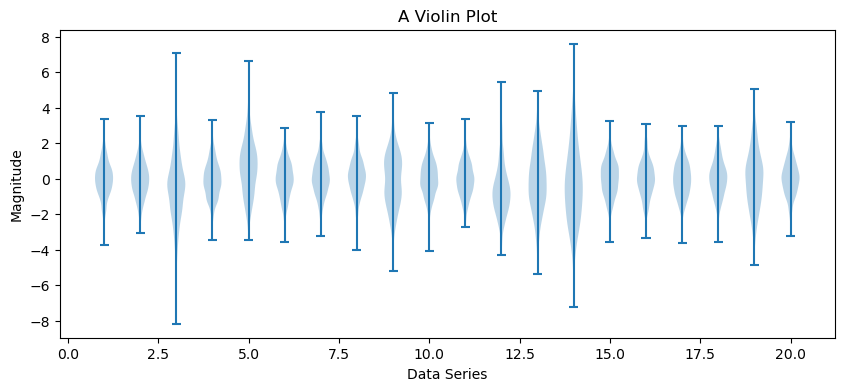

In [5]:
fig = plt.figure(figsize=[10, 4])
ax = fig.add_subplot(1, 1, 1)
ax.violinplot(X_class)
ax.set_xlabel('Data Series')
ax.set_ylabel('Magnitude')
ax.set_title('A Violin Plot')

**What's it show?**
The distribution of each data series.

**When would you use it?**
In similar settings to a box plot. It shows a bit more detail in that you can see the shape of the distribution of each series, and get a sense of the underlying distribution types. Total spread is still shown, though the centre of the data is perhaps a bit less clear, as are any outliers. Compared to a box plot, you get a better overall sense of the shape of the distribution (is it Gaussian?), but don't get details like outliers or the location of the median. Like a box plot, you could use this to check if you have dimensions with very different scales and if standardisation might be needed.

**What does it not show?**
Individual measures, such as the mean, median, or inter-quartile distance. Outliers are also not shown.

**Is there any data it's bad for?**
Categorical data types. Like a box plot, it really makes no sense for categorical data.

### Scatter Plots and Correlation

Text(0.5, 1.0, 'Correlation Coefficient: -0.328')

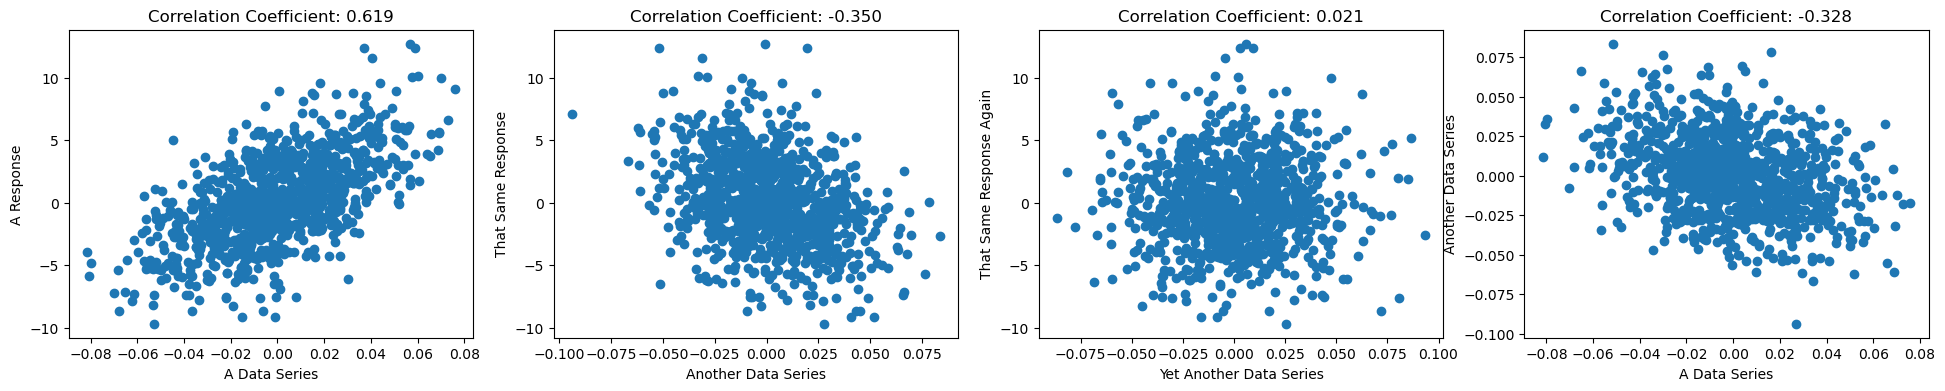

In [6]:
fig = plt.figure(figsize=[24, 4])
ax = fig.add_subplot(1, 4, 1)
ax.scatter(X_reg[:,2], y_reg)
ax.set_xlabel('A Data Series')
ax.set_ylabel('A Response')
ax.set_title('Correlation Coefficient: %1.3f' % numpy.corrcoef(X_reg[:,2], y_reg)[0,1])

ax = fig.add_subplot(1, 4, 2)
ax.scatter(X_reg[:,6], y_reg)
ax.set_xlabel('Another Data Series')
ax.set_ylabel('That Same Response')
ax.set_title('Correlation Coefficient: %1.3f' % numpy.corrcoef(X_reg[:,6], y_reg)[0,1])

ax = fig.add_subplot(1, 4, 3)
ax.scatter(X_reg[:,8], y_reg)
ax.set_xlabel('Yet Another Data Series')
ax.set_ylabel('That Same Response Again')
ax.set_title('Correlation Coefficient: %1.3f' % numpy.corrcoef(X_reg[:,8], y_reg)[0,1])

ax = fig.add_subplot(1, 4, 4)
ax.scatter(X_reg[:,2], X_reg[:,6])
ax.set_xlabel('A Data Series')
ax.set_ylabel('Another Data Series')
ax.set_title('Correlation Coefficient: %1.3f' % numpy.corrcoef(X_reg[:,2], X_reg[:,6])[0,1])


**What's it show?**
How one variable changes with another. Each axis corresponds to a variable, and we simply plot a point for each pair of values. The shapes we see in the scatter plot illustrate the underlying relationships in the data. In this case we see a moderate positive linear trend (as one variable increases, so does the other) in the first plot, and weaker inverse linear trends (as one variable goes up, the other goes down) in the second and fourth plots. The middle trend shows no relationship between the two data series. The correlation coefficients in the plot titles give an additional sense of this relationship (remember that a correlation coefficient of 0 means no relationship).

**When would you use it?**
When looking for linear relationships in data. This can be very helpful for linear regression as you are assuming that your predictors and response have a linear relationship (non-zero correlation), and that your predictors are independent (are uncorrelated). It can also be useful for classification or other tasks when trying to identify potentially redundant variables, as variables that are highly correlated are likely capturing similar information.

**What does it not show?**
Each plot only shows the relationship between a pair of variables. Missing data is not clearly shown.

**Is there any data it's bad for?**
For categoricals or discrete data plots can be harder to visualise (though adding *jitter* can help). For large datasets where lots of pairs of variables need to be considered, individual scatter plots can become unwieldy quickly.

### Correlation Heat-Maps

Text(0.5, 1.0, 'Correlation Between Variables')

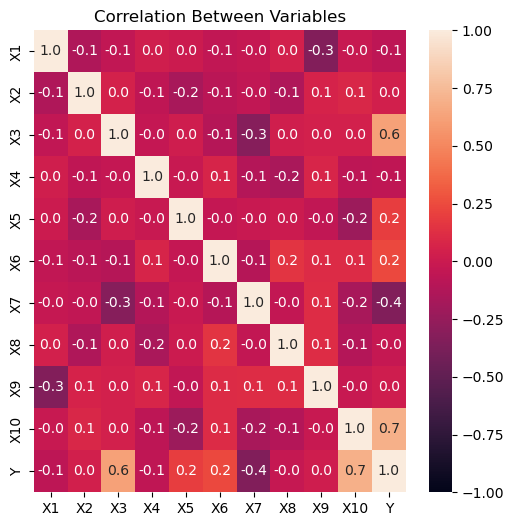

In [7]:
corrcoef = numpy.corrcoef(numpy.hstack((X_reg, numpy.expand_dims(y_reg, axis=1))), rowvar=False)
labels = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'Y']
fig = plt.figure(figsize=[6, 6])
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(corrcoef, annot=True, fmt=".1f", vmin=-1, vmax=1, xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_title('Correlation Between Variables')

**What's it show?**
The correlation between all pairs of variables (X1 to X10), and the variables and the response (Y). 

**When would you use it?**
When looking for linear relationships across a dataset with lots of variables. This allows you to quickly see pairs of variables that have a strong linear relationship, or those that have none. As such, this can be used to quickly identify sources of multi-colinearity in a linear regression model, or find terms that have little to no relationship to the response and thus should (perhaps) be removed.

**What does it not show?**
The shape of the relationship. You only get a correlation value, and this can be misleading. The more detailed information in a scatter plot that might hint at a quadratic relationship, or something else, is lost here.

**Is there any data it's bad for?**
Unless the correlation between variables, or between the variables and the response is of interest, this plot has no use. For data that inherently contains a high degree of multi-colinearity (signal type data, such as images of audio) this sort of plot is likley useless. For very high dimensional datasets resulting scatter plots will also be hard to interpret. 

### Class Histograms

Text(0.5, 1.0, 'Number of Instances of Each Class')

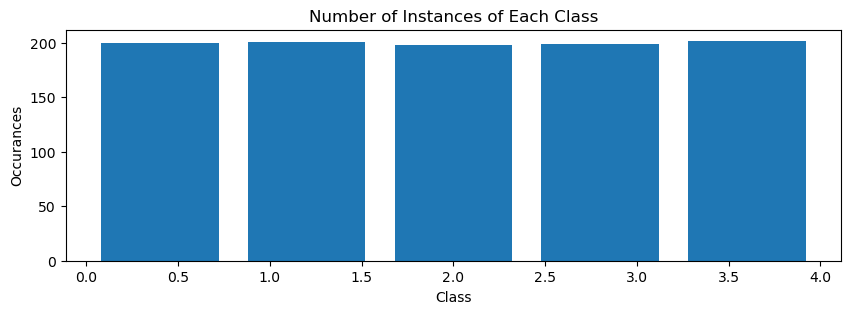

In [8]:
fig = plt.figure(figsize=[10, 3])
ax = fig.add_subplot(1, 1, 1)
ax.hist(y_class, 5, rwidth=0.8)
ax.set_xlabel('Class')
ax.set_ylabel('Occurances')
ax.set_title('Number of Instances of Each Class')

**What's it show?**
The number of samples present for each class. 

**When would you use it?**
As a pre-cursor to a classification task, where you are concerned about class balance. This allows you to quickly and easily see if you have a roughly similar number of samples for each class. You can also compute this for training, validation and testing datasets and make sure that you have the same (approximate) class distribution for all datasets. You could also use this sort of plot to visualise the distribution of other categorical data types in your dataset.

**What does it not show?**
Any information on the actual class separability. There is no sense here of how similar two classes may or may not be for example - you just get the number of instances of each.

**Is there any data it's bad for?**
You can plot a histogram of anything - for example we can use a histogram to look at the distribution of the residuals for linear regression - so the above can be easily adapted to lots of different settings. That said, looking the distribution for lots of variables could get tedious, so violin plots might make more sense in such cases.

### Class-Labelled Scatter Plots

Text(0.5, 1.0, 'Class Scatter Plot, TSNE')

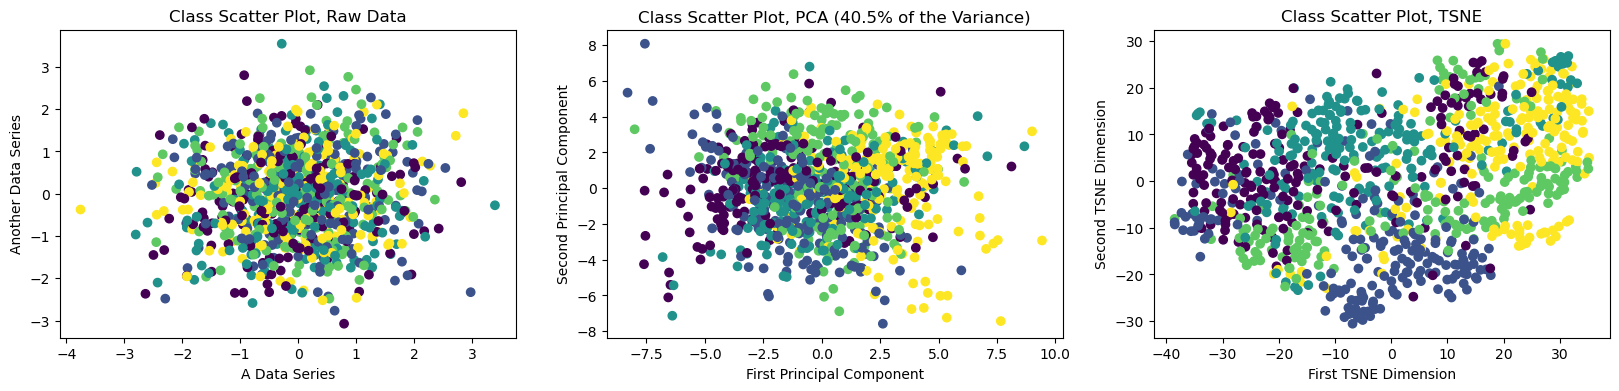

In [19]:
fig = plt.figure(figsize=[20, 4])
ax = fig.add_subplot(1, 3, 1)
ax.scatter(X_class[:,0], X_class[:,1], c=y_class)
ax.set_xlabel('A Data Series')
ax.set_ylabel('Another Data Series')
ax.set_title('Class Scatter Plot, Raw Data')

ax = fig.add_subplot(1, 3, 2)
pca = PCA(n_components=2).fit(X_class)
X_class_pca = pca.transform(X_class)
ax.scatter(X_class_pca[:,0], X_class_pca[:,1], c=y_class)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('Class Scatter Plot, PCA (%2.1f%% of the Variance)' % (numpy.sum(pca.explained_variance_ratio_)*100))

ax = fig.add_subplot(1, 3, 3)
X_class_tsne = TSNE(random_state=42).fit_transform(X_class)
ax.scatter(X_class_tsne[:,0], X_class_tsne[:,1], c=y_class)
ax.set_xlabel('First TSNE Dimension')
ax.set_ylabel('Second TSNE Dimension')
ax.set_title('Class Scatter Plot, TSNE')

**What's it show?**
The distribution of the data (or some of the dimensions of the data), with class labels overlayed.

**When would you use it?**
Potentially as a pre-cursor to a classification task to understand if your classes are separable in anyway, or as an analysis task after fitting a model to try and understand why some classes are working better than others. How you pass your data into the scatter plot can also greatly impact the utility of the plot. Considering what we have, on the left we are using the first two raw dimensions (of 20), and we see a mess. Picking a different pair of dimensions would perhaps show something more helpful, but there are a lot of pairs to sort through. The middle plot uses PCA and pulls out the top two principal components. These explain 40% of the variance, and so we can see that there is some class separability in the data. Our plot on the right uses TSNE and we can see from this that we have some good class groupings, though with some noisy points scattered about. 

**What does it not show?**
None of the plots show the true distrribution of the data. All comprimise in some way - the first only shows two dimensions; the second shows a projection of data that still only shows two dimensions; and the third shows a learned transform that has similar characteristics to the overall data distribution.  

**Is there any data it's bad for?**
This is the sort of plot is really only of use with classification tasks - so you're not going to use it with regression. Depending on how many dimensions you've got, different options above might make more sense. As you add more and more dimensions, the first plot (just a pair of dimensions) will become increasingly useless; and for really high numbers where little variance is explained by the first two components the second plot will also be rubbish. With very high number of classes, the plots may also be hard to visualise due to difficulties telling classes apart (though you could always just plot a few classes).